The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path += ['../../../easyXRD']

In [3]:
import easyxrd



Checking required packages:

---ipympl package with version 0.9.4 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---scipy package with version 1.14.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pymatgen package with version 2024.8.9 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---mp_api package with version 0.42.1 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---pandas package with version 2.2.2 is available and imported 


Imported pysuli with following configuration:



In [4]:
from easyxrd.core import exrd

In [5]:
import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [7]:
# we use pyFAI for integrations: https://pyfai.readthedocs.io/en/v2023.1/
# It there exists a poni file and mask, we can load them like this:
import pyFAI,fabio

ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'

ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data

In [8]:
%%time

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file='nc_files/Kapton.nc',plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file='nc_files/Air.nc',plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/NIST-LaB6.nc',plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file='nc_files/NIST-CeO2.nc',plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file='nc_files/NIST-LaB6-CeO2-mix.nc',plot=False)

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_CeO2 = [
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_mix = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 88.4 ms, sys: 6.81 ms, total: 95.2 ms
Wall time: 94.4 ms


GSAS-II binary directory: /home/mt/g2full/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/g2full/GSAS-II/GSASII/config.py
GSASIIplot: wx not imported
ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build

Rwp from 1st refinement is = 5.399 
 
Background is refined. Rwp is now 4.735 (was 5.399)
Cell parameters of all phases are refined. Rwp is now 4.631 (was 4.735)
ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build
After LeBail refinement, Rwp is now 5.282 (was 4.631)


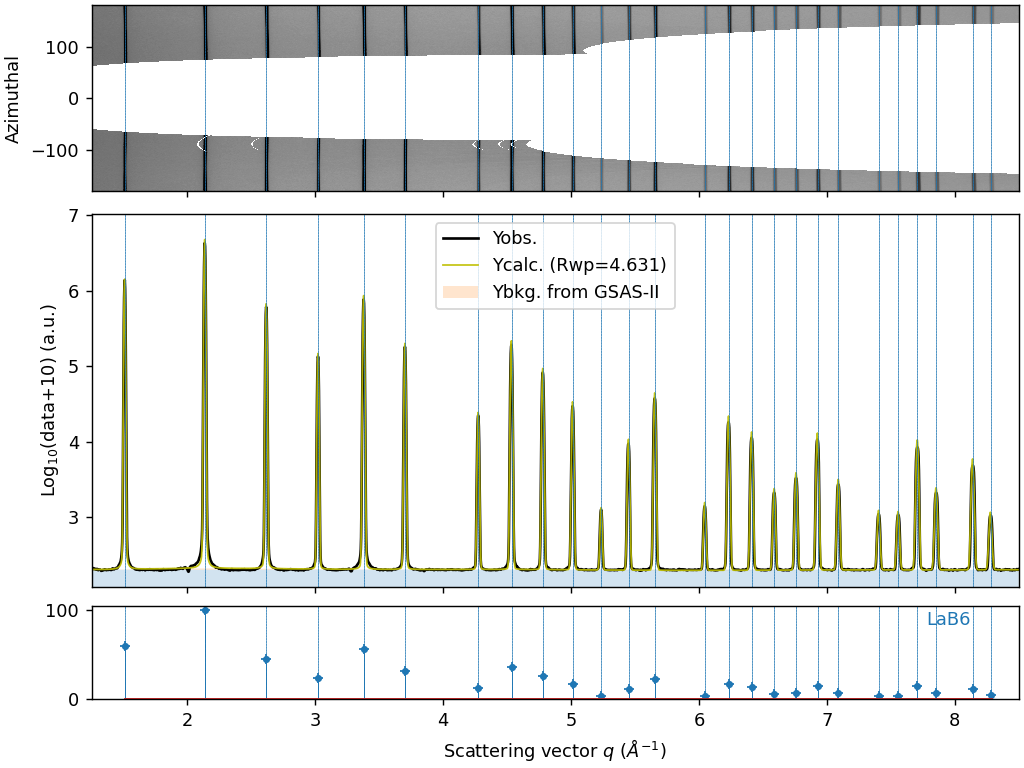

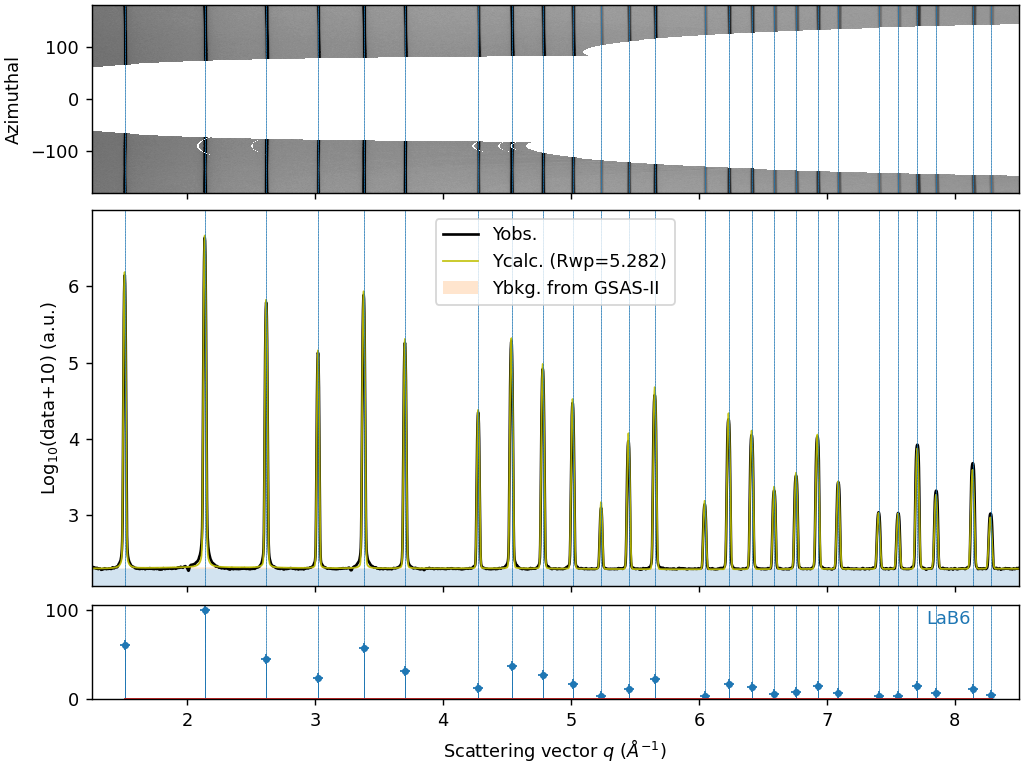

In [9]:
sample = sample_LaB6
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.25,8.5],
                    plot=False)
sample.load_phases(phases=phases_LaB6,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.set_LeBail()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()


Rwp from 1st refinement is = 10.390 
 
Background is refined. Rwp is now 9.118 (was 10.390)
Cell parameters of all phases are refined. Rwp is now 5.912 (was 9.118)
After LeBail refinement, Rwp is now 7.771 (was 5.912)


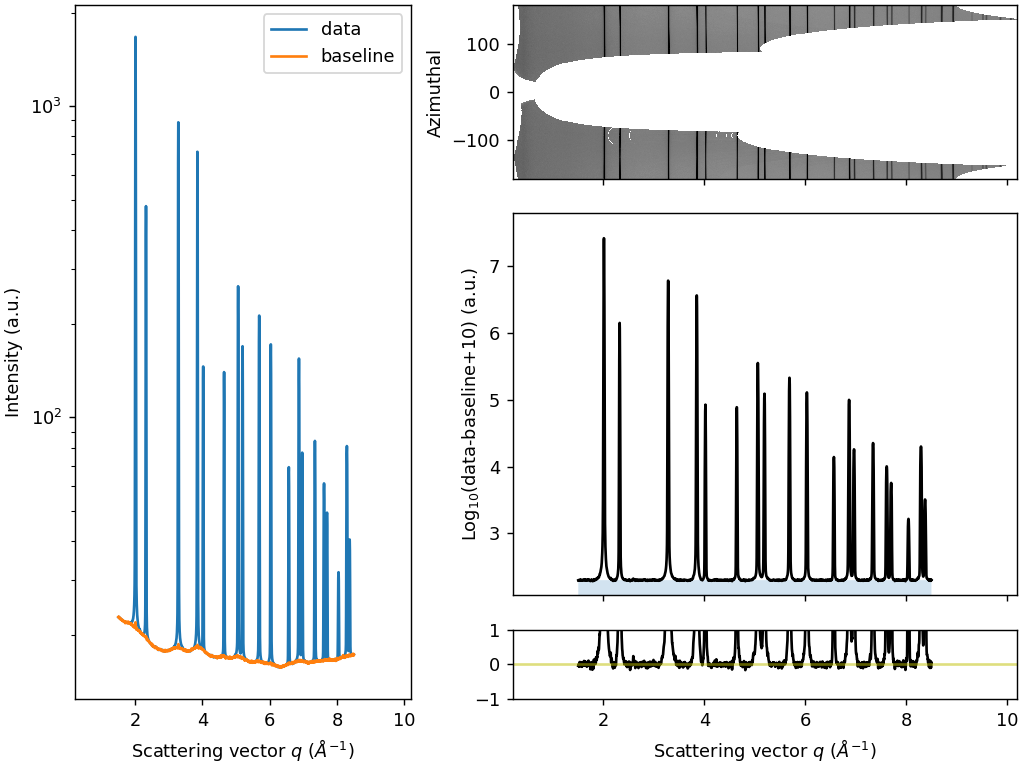

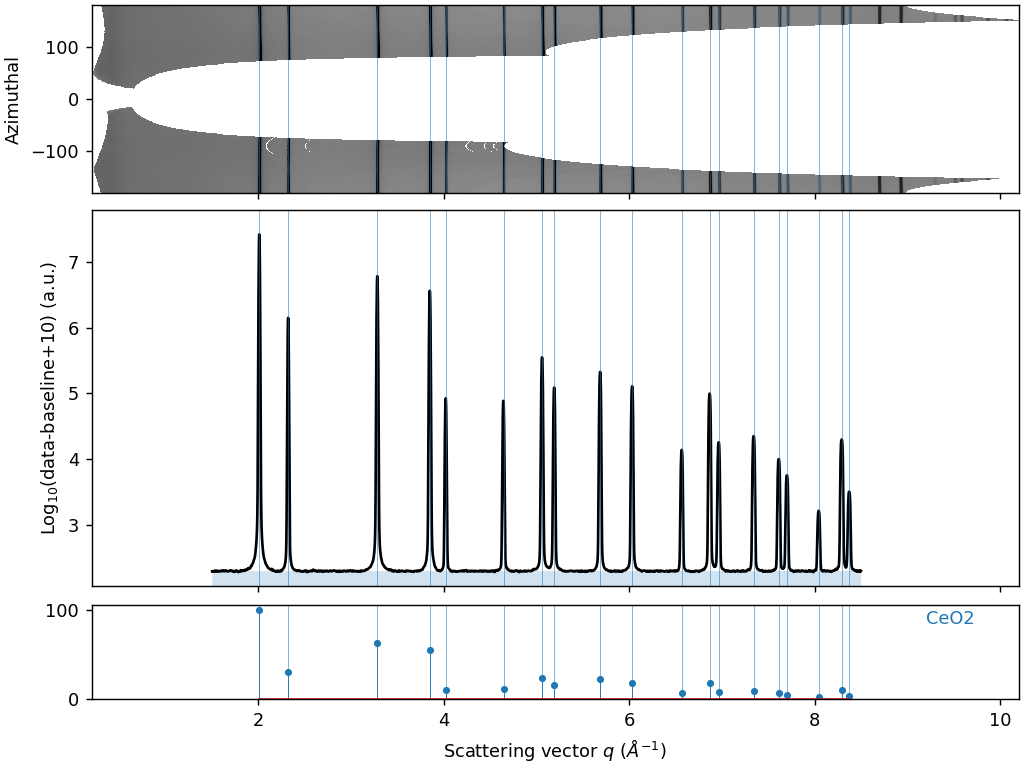

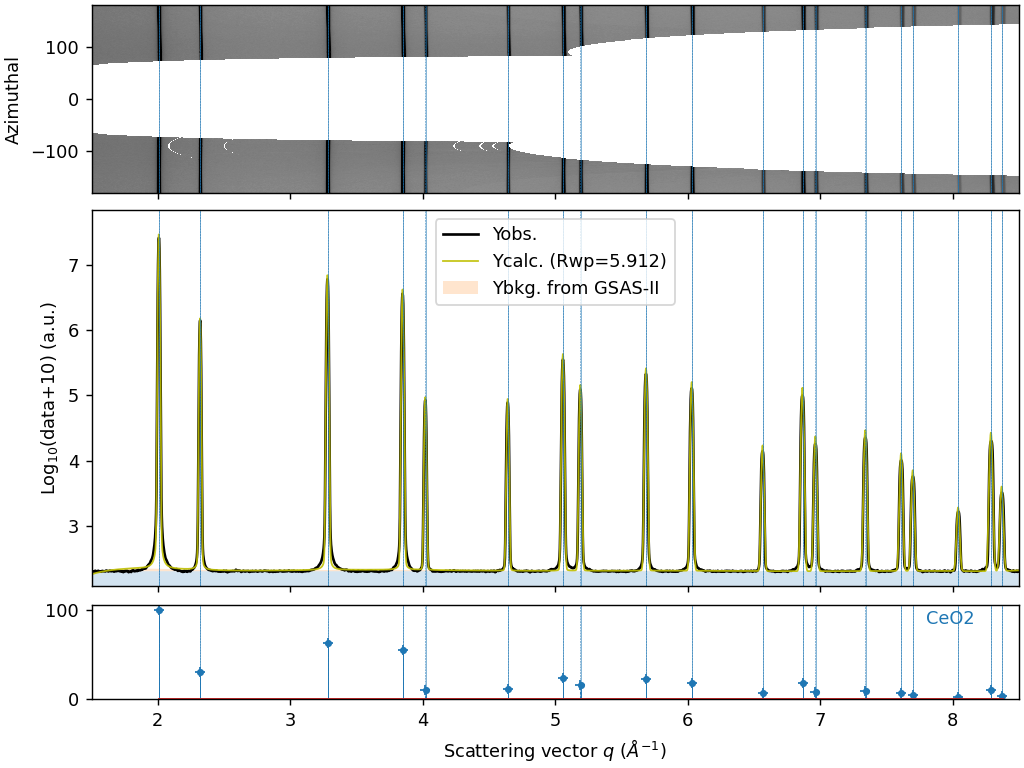

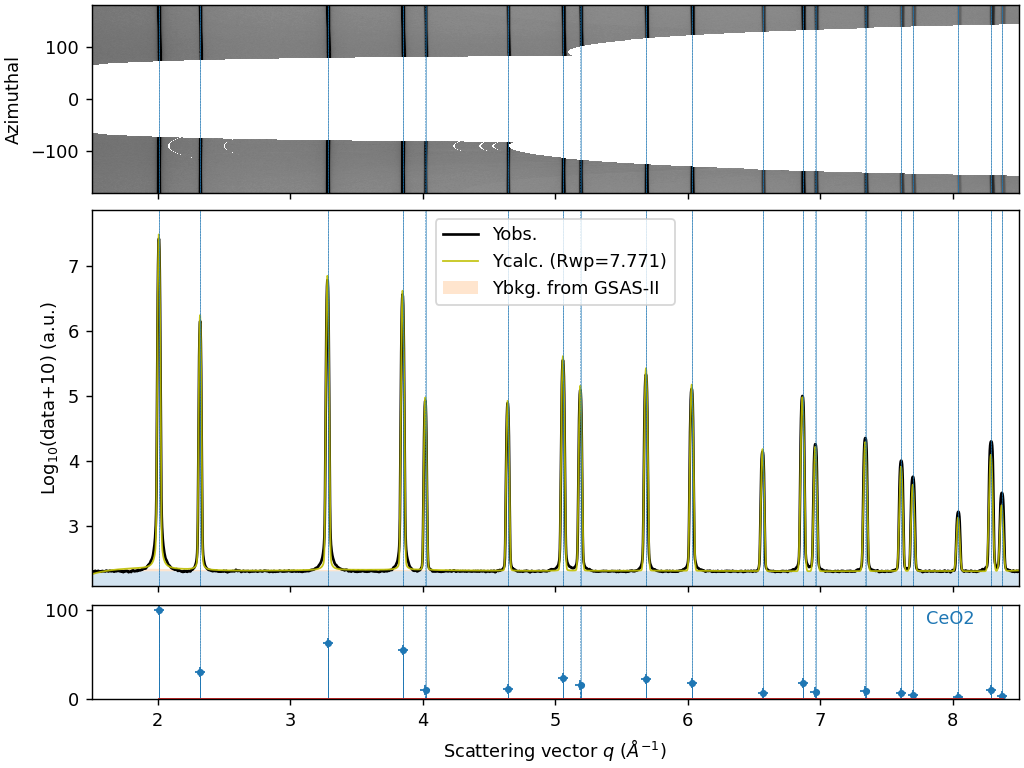

In [10]:
sample = sample_CeO2
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.5,8.5],
                    # roi_azimuthal_range=[0,90],
                    plot=True)
sample.load_phases(phases=phases_CeO2,plot=True)

# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.set_LeBail()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()


Rwp from 1st refinement is = 31.227 
 
Background is refined. Rwp is now 8.296 (was 31.227)
Cell parameters of all phases are refined. Rwp is now 5.340 (was 8.296)
After LeBail refinement, Rwp is now 8.084 (was 5.340)


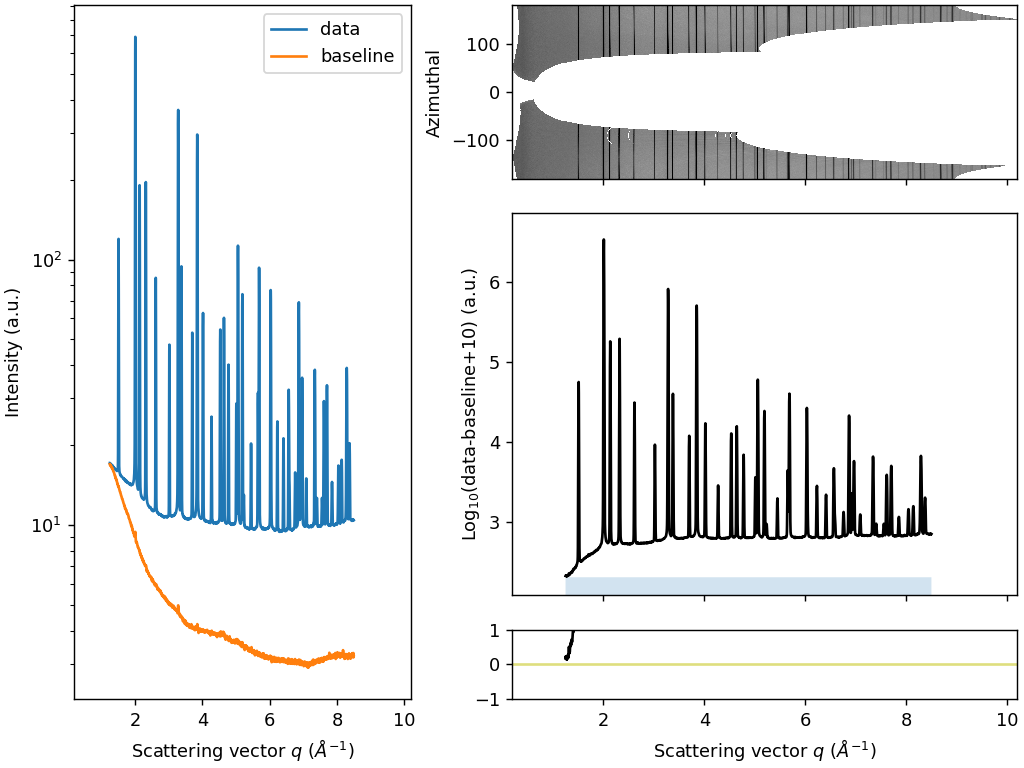

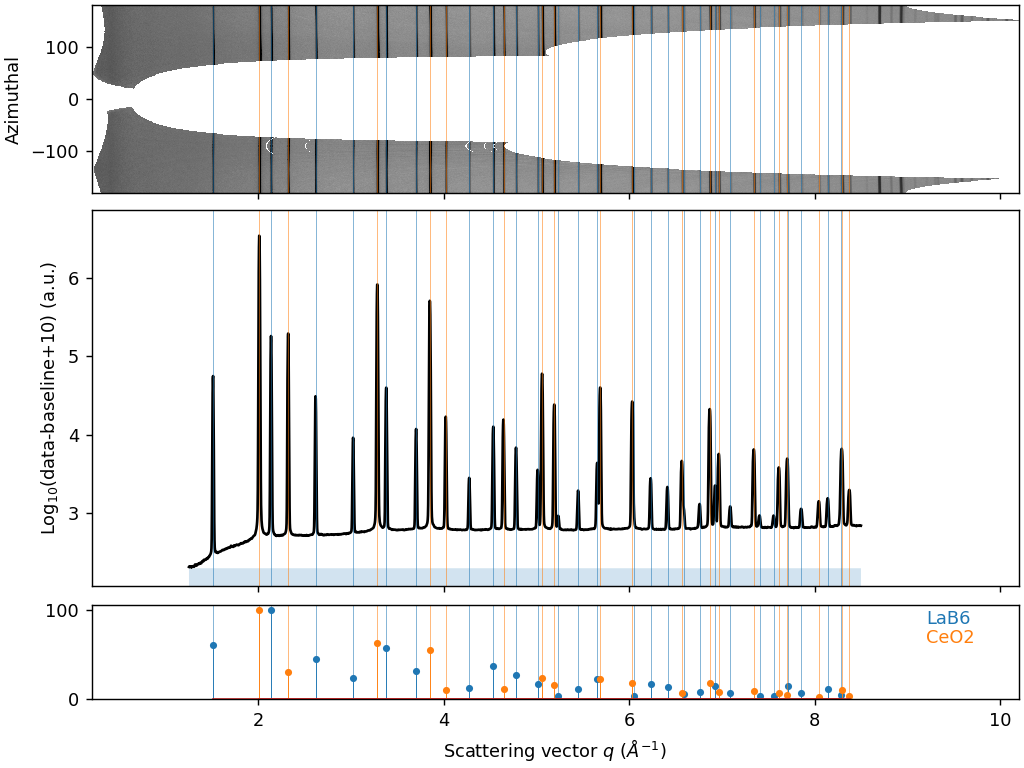

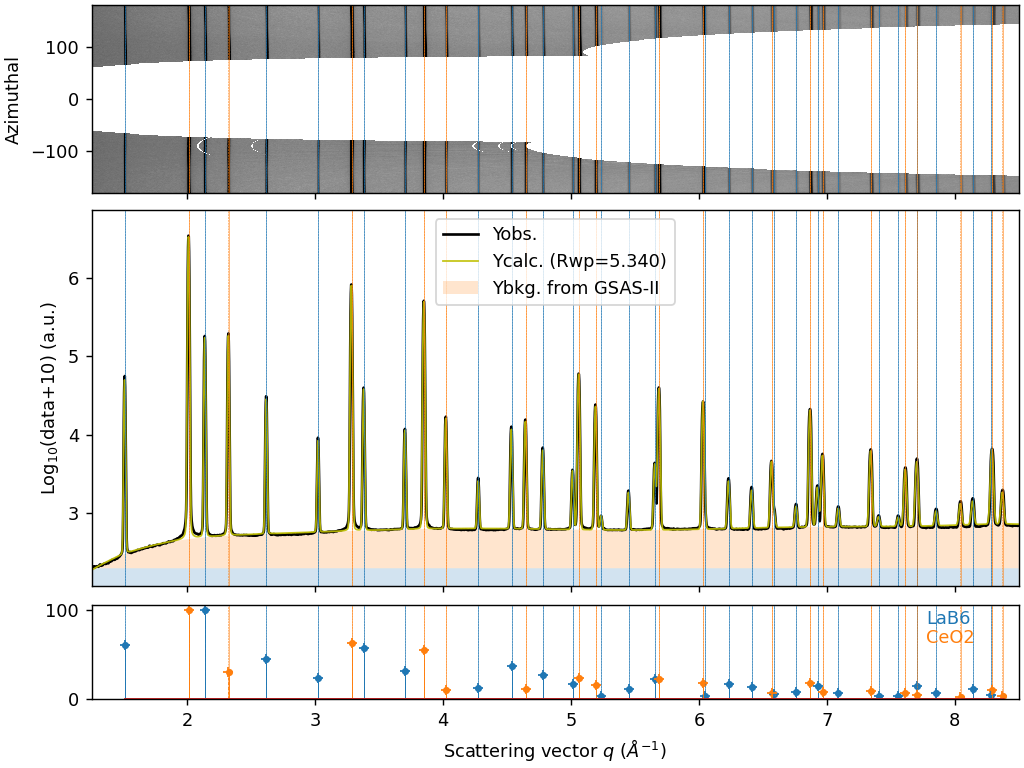

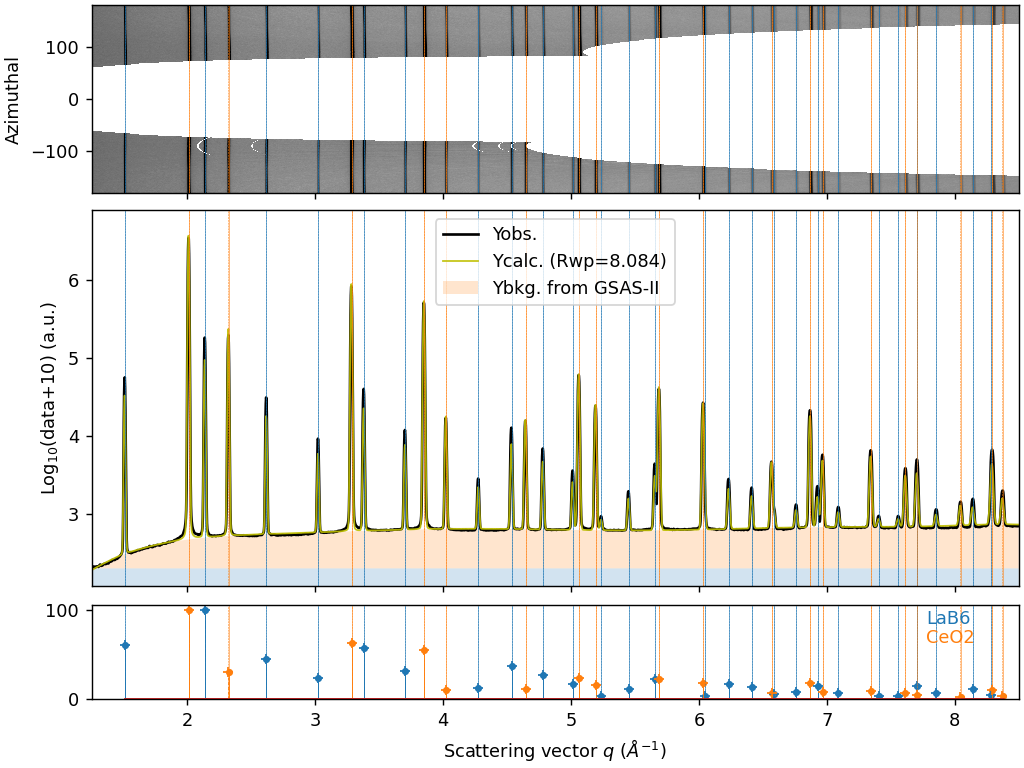

In [11]:
sample = sample_mix
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.25,8.5],
                    plot=True)

sample.load_phases(phases=phases_mix,plot=True)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.refine_background(num_coeffs=10)
sample.set_LeBail()
sample.refine_cell_params()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()

In [12]:
# sample_mix.fine_tune_gpx()

In [13]:
# sample_mix.plot_refinement()